# TDA & Deep Learning Project Report

Floran DEFOSSEZ
Gatien Chopard
Sebastien ROIG

Ce notebook a pour objectif de synthétiser et illustrer les concepts et résultats de l'article de Bertand Michel and Frédéric Chazal "An Introduction to Topological Data Analysis: Fundamental and Practical Aspects for Data Scientists". Nous allons uliliser pour cela la librairie GUDHI.

# Simplicial Complexes

Un complexe simplicial est un objet géométrique permettant de décrire certains espaces topologiques en généralisant la notion de triangulation d'une surface. Il se présente comme un graphe avec des sommets reliés par des arêtes, sur lesquelles peuvent se rattacher des faces triangulaires, elles-mêmes bordant éventuellement des faces de dimension supérieure. On peut se représenter un complexe comme un ensemble de sommets munis d'hyper-arêtes (simplexes) : les arêtes de dimention deux relient 2 points c'est une ligne, les arêtes de dimension trois relient 3 points c'est une surface etc.

Afin de d'analyser le structure topologique d'un nuage de point, il est possible de se servir d'un complexe simplicial construit à partir de ces données. Il existe de nombreuses méthodes de construction, nous allons vous présenter le compexe de Vietoris–Rips et le compexe de Alpha.

#### The Vietoris-Rips

Le complexe de Vietoris-Rips consiste à considérer toutes les simplexes $[x_1 ... x_n]$ tel que pour toute paire d'indice $(i,j)$, la distance $d(x_i,x_j) < \alpha$ .

Ci-dessous sont représenté les complexes de Rips à partir d'un ensemble de 100 points échantillonées sur une couronne du plan euclidien pour 2 valeurs de alpha.

In [16]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import utils
%matplotlib inline


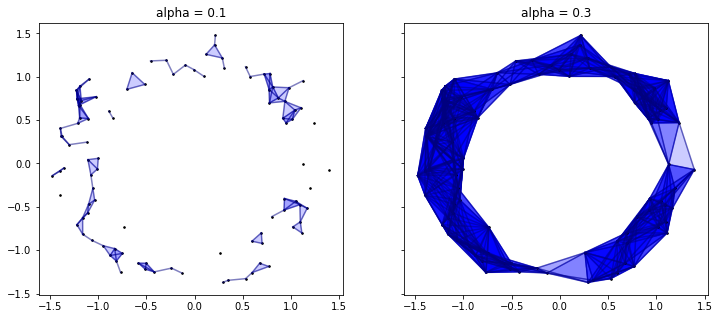

In [70]:

points = utils.anulus(100)

alpha = [0.1,0.3]
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))

for i in range(2):
    rips_complex = gd.RipsComplex(points=points)
    simplex_tree = rips_complex.create_simplex_tree(2)
    triangles = np.array([x[0] for x in simplex_tree.get_skeleton(2) if len(x[0]) == 3 and x[1] <= 2*alpha[i]])
    lines = np.array([x[0] for x in simplex_tree.get_skeleton(2) if len(x[0]) == 2 and x[1] <= 2*alpha[i]])

    ax[i].set_title(f"alpha = {alpha[i]}")
    for triangle in triangles:
        ax[i].fill(points[triangle][:,0], points[triangle][:,1], color='b', alpha=0.2)
    for line in lines:
        ax[i].plot(points[line][:,0], points[line][:,1], c='navy', alpha=0.5)
    ax[i].scatter(points[:,0],points[:,1],s=2.5,c='black')
plt.show()



On remarque que pour une valeur d'alpha trop faible, la filtration est trop restrictive et les simplexes ne parviennent pas à se rejoindre pour reformer un anneau. Par ailleurs, si on avait choisi une valeur alpha très grande, toutes les simplexes constructibles aurait été accepté et on aurait obtenu un disque.

Choisir la bonne valeur de filtration aplha est donc primordiale pour construire un complexes dont les propriétés topologiques ressemble à l'object échantillonné.

#### Complexe Alpha

Le complexe Alpha consiste à considérer tous les simplexes $[x_1...x_n]$ tel que le cercle de dimension n circonscrit passant par l'ensembles des points $x_1,...x_n$ à un rayon dont le carré est inférieur à $\alpha$ et ne contient aucun autre point. Ces conditions permettent de constituer des simplexes qui ne se chevauchent pas.

Représentons de la même manière les complexes Alpha issue du même nuage de point.

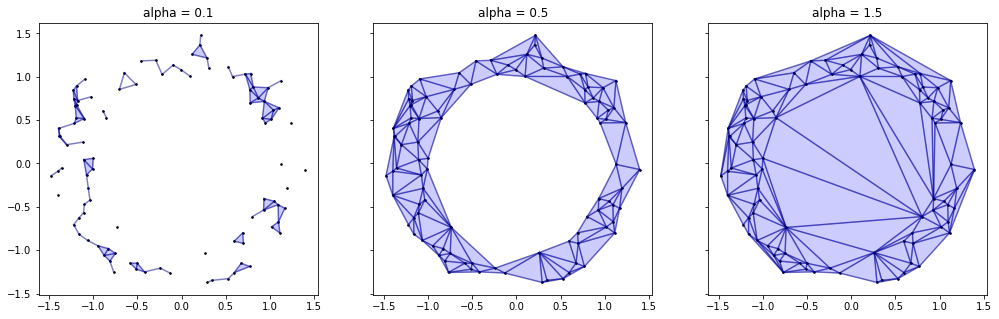

In [89]:
alpha = [0.1,0.5,1.5]

cech_complexe = gd.AlphaComplex(points=points)
simplex_tree = cech_complexe.create_simplex_tree()

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(17, 5))
for i in range(3):
    triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= alpha[i]**2])
    lines = np.array([x[0] for x in simplex_tree.get_skeleton(2) if len(x[0]) == 2 and x[1] <= alpha[i]**2])
    ax[i].set_title(f"alpha = {alpha[i]}")
    for triangle in triangles:
        ax[i].fill(points[triangle][:,0], points[triangle][:,1], color='b', alpha=0.2, )
    for line in lines:
        ax[i].plot(points[line][:,0], points[line][:,1], c='navy', alpha=0.5)
    ax[i].scatter(points[:,0],points[:,1],s=2.5,c='black')
plt.show()

Globalement, nous obtenons effectivement le même comportement qu'avec la méthode de Rips. Cependant, nous constatons qu'elle est bien plus rapide à être calculé, nous proposons donc la construction d'un complexe sur un nuage de point en 3 dimensions échantillonées sur la surface d'un tore.

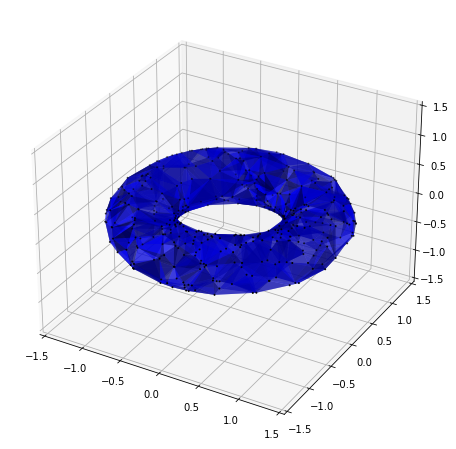

In [27]:
points = utils.torus(400,1,0.4)

cech_complexe = gd.AlphaComplex(points=points)
simplex_tree = cech_complexe.create_simplex_tree()
triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 0.1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles = triangles, alpha=0.5, color='b')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, c='black')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
plt.show()

On voit que le complexe semble bien récupérer la structure de tore

# The Mapper Algorithm

# Geometric Reconstruction and Homology Inference

# Persistent Homology

# Statistical Aspects of Persistent Homology